In [75]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [77]:
def load_and_preprocess_data():

    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [79]:
def create_model(modelSize):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(modelSize,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [81]:
 def train(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)

In [88]:
def loadData():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    return (x_train, y_train), (x_test, y_test)

In [89]:
def preprocessCifar(x_train, y_train, x_test, y_test):
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)
    
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [90]:
(x_train, y_train), (x_test, y_test) = loadData()
(x_train, y_train), (x_test, y_test) = preprocessCifar(x_train, y_train, x_test, y_test)

In [98]:
cifarModel = create_model(3072)
train(cifarModel, x_train, y_train, x_test, y_test)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.1094 - loss: 61.2694 - val_accuracy: 0.1012 - val_loss: 2.3057
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0984 - loss: 2.3033 - val_accuracy: 0.1022 - val_loss: 2.3008
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1033 - loss: 2.3024 - val_accuracy: 0.0951 - val_loss: 2.3043
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.1004 - loss: 2.3026 - val_accuracy: 0.0951 - val_loss: 2.3046
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.0989 - loss: 2.3029 - val_accuracy: 0.0955 - val_loss: 2.3038
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1004 - loss: 2.3023 - val_accuracy: 0.0955 - val_loss: 2.3040
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1013 - loss: 2.3016 - val_accuracy: 0.0953 - val_loss: 2.3042
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.1010 - loss: 2.3029 - val_ac

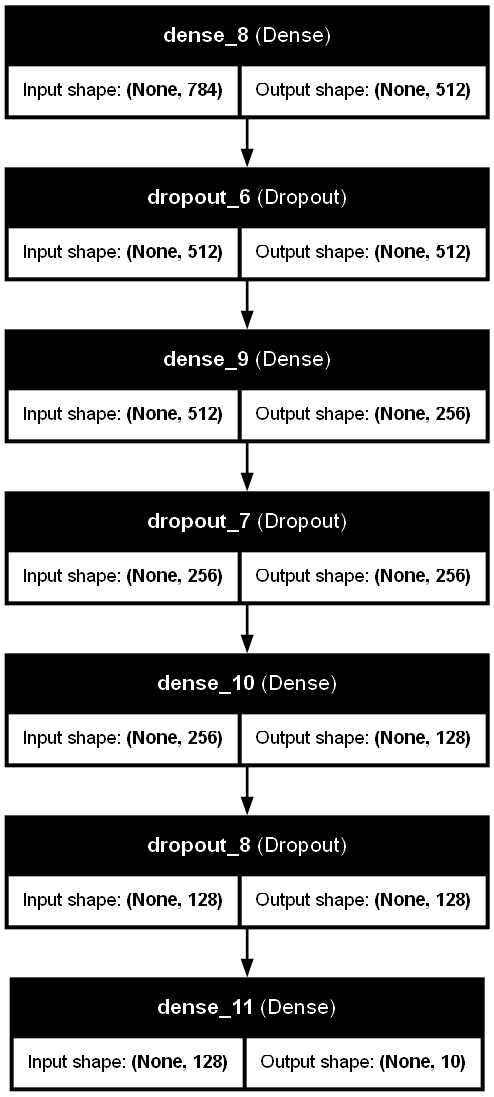

In [100]:
    tf.keras.utils.plot_model(
         model,
         to_file="cifarModel.png",
         show_shapes=True,
         show_layer_names=True,
         rankdir="TB",
         expand_nested=False,
         dpi=96,
    )
    from IPython.display import Image
    Image('cifarModel.png')